## Lab 4 - Exploratory Data Analysis with Pandas Matplolib & Seaborn - SOLUTIONS

https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python

In [1]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
mpl.rcParams['figure.figsize'] = (5.33,4)
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
HTML("<style>.dataframe {font-size: 60% !important;}</style>")

**Exercise 1**

In [2]:
import kagglehub

path = kagglehub.dataset_download("CooperUnion/cardataset")
path

'/home/jupyter-mpenagaricano/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1'

**Exercise 2**

In [3]:
df = pd.read_csv(f'{path}/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
df.shape

(11914, 16)

In [6]:
for c in df.columns:
    if df[c].dtype == np.dtype('O') :
        u = df[c].unique()
        print(f'{"-"*20} Column: {repr(c)} ({u.size} values) {"-"*20}')
        if u.size > 10 :
            print(*u[:5], "...", *u[-5:], sep=', ')
        else :
            print(*u, sep=', ')

-------------------- Column: 'Make' (48 values) --------------------
BMW, Audi, FIAT, Mercedes-Benz, Chrysler, ..., Scion, Genesis, HUMMER, Tesla, Bugatti
-------------------- Column: 'Model' (915 values) --------------------
1 Series M, 1 Series, 100, 124 Spider, 190-Class, ..., Z4 M, Z4, Z8, ZDX, Zephyr
-------------------- Column: 'Engine Fuel Type' (11 values) --------------------
premium unleaded (required), regular unleaded, premium unleaded (recommended), flex-fuel (unleaded/E85), diesel, ..., flex-fuel (premium unleaded recommended/E85), natural gas, flex-fuel (premium unleaded required/E85), flex-fuel (unleaded/natural gas), nan
-------------------- Column: 'Transmission Type' (5 values) --------------------
MANUAL, AUTOMATIC, AUTOMATED_MANUAL, DIRECT_DRIVE, UNKNOWN
-------------------- Column: 'Driven_Wheels' (4 values) --------------------
rear wheel drive, front wheel drive, all wheel drive, four wheel drive
-------------------- Column: 'Market Category' (72 values) -------

**Exercise 3**

In [7]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
drop_columns = ['Make','Model','Engine Fuel Type', 
                'Transmission Type', 'Driven_Wheels', 
                'Market Category', 'Vehicle Size', 
                'Vehicle Style']
df = df.drop(drop_columns, axis=1)
df.head(5)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [9]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cyl", 
                          "Number of Doors": "Doors", "highway MPG": "MPG-H", 
                          "city mpg": "MPG-C", "Popularity": "Pop", "MSRP": "Price" })
df.head(5)

,Year,HP,Cyl,Doors,MPG-H,MPG-C,Pop,Price
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


**Exercise 4**

In [10]:
mask = df.duplicated()
print(f'Duplicated rows: {mask.sum()}')
print(f'Original shape:  {df.shape}')
print(f'Filtered shape:  {df[~mask].shape}')
print(f'Filtered2 shape: {df.drop_duplicates().shape}')
df = df[~mask]

Duplicated rows: 936
Original shape:  (11914, 8)
Filtered shape:  (10978, 8)
Filtered2 shape: (10978, 8)


**Exercise 5**

In [11]:
df.isnull().sum()

Year      0
HP       69
Cyl      30
Doors     6
MPG-H     0
MPG-C     0
Pop       0
Price     0
dtype: int64

In [12]:
df = df.dropna()
df.shape

(10879, 8)

**Exercise 6**

Most expensive car price: $2065902


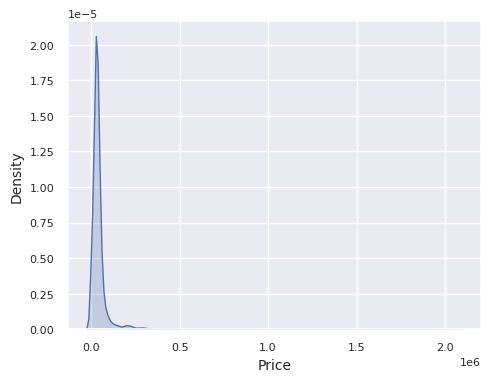

In [13]:
print(f'Most expensive car price: ${df['Price'].max()}')
sns.kdeplot(df['Price'], fill=True);

In [14]:
df.quantile(0.25)

Year      2007.0
HP         173.0
Cyl          4.0
Doors        2.0
MPG-H       22.0
MPG-C       16.0
Pop        549.0
Price    21780.0
Name: 0.25, dtype: float64

In [15]:
df.quantile(0.75)

Year      2016.0
HP         303.0
Cyl          6.0
Doors        4.0
MPG-H       30.0
MPG-C       22.0
Pop       2009.0
Price    43185.0
Name: 0.75, dtype: float64

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print(outliers.shape)
outliers = outliers.any(axis=1)
print(outliers.shape)
df = df[~outliers]
df.shape

(10879, 8)
(10879,)


(8467, 8)

Most expensive car price: $75200


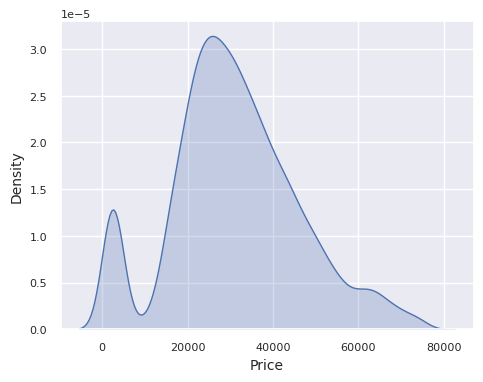

In [17]:
print(f'Most expensive car price: ${df['Price'].max()}')
sns.kdeplot(df['Price'], fill=True);

**Exercise 7**

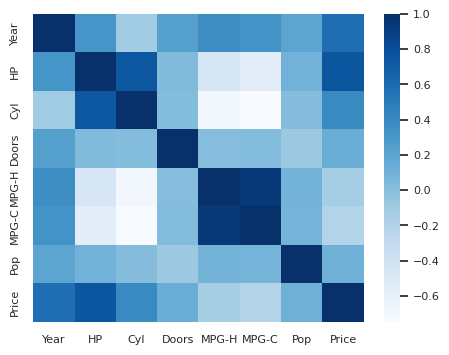

In [18]:
sns.heatmap(df.corr(), cmap="Blues");

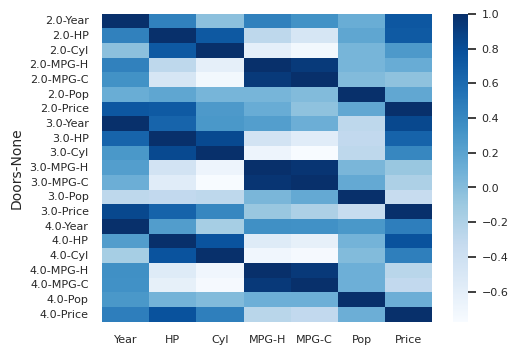

In [19]:
sns.heatmap(df.groupby('Doors').corr(), cmap="Blues");

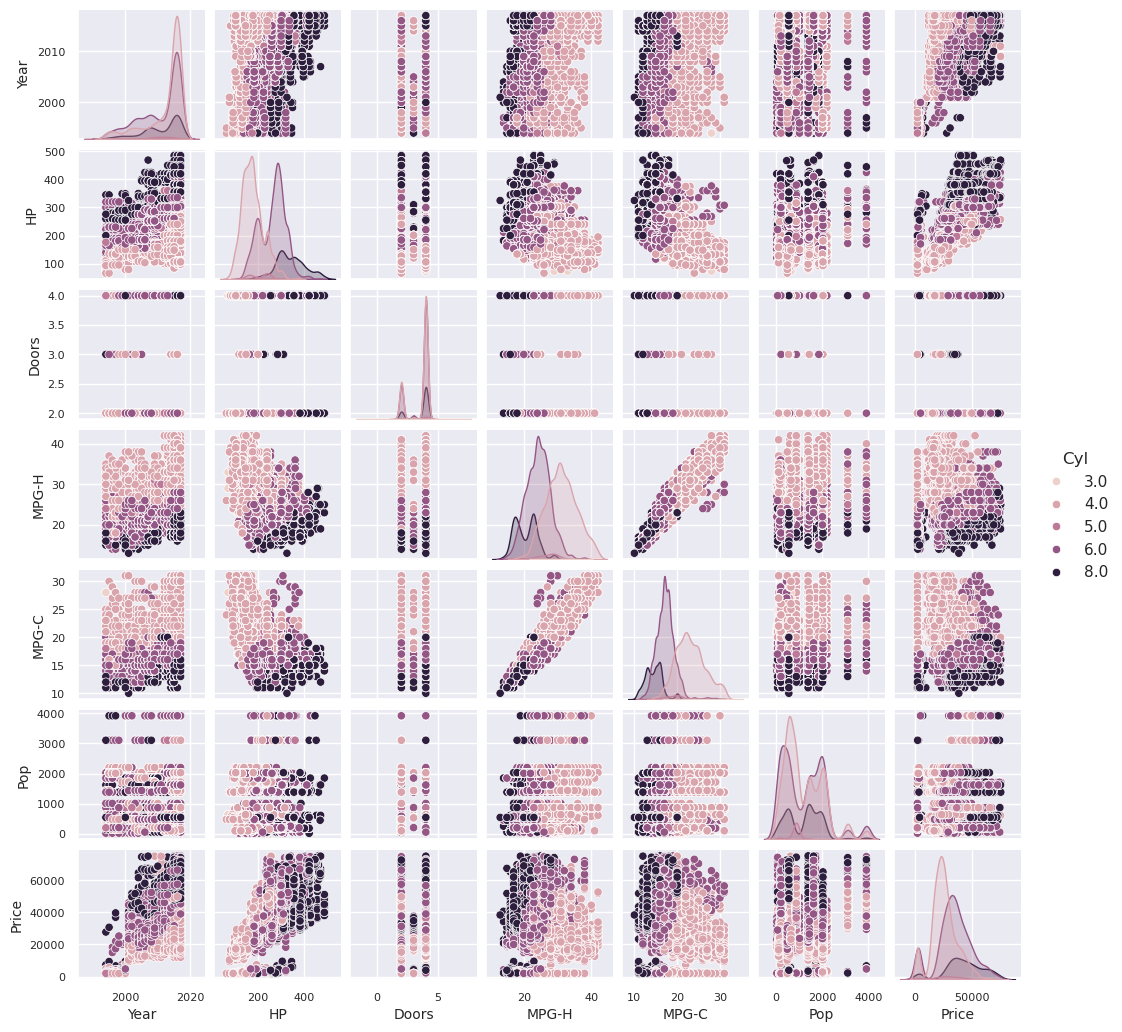

In [20]:
sns.pairplot(df, hue='Cyl', height=1.5);